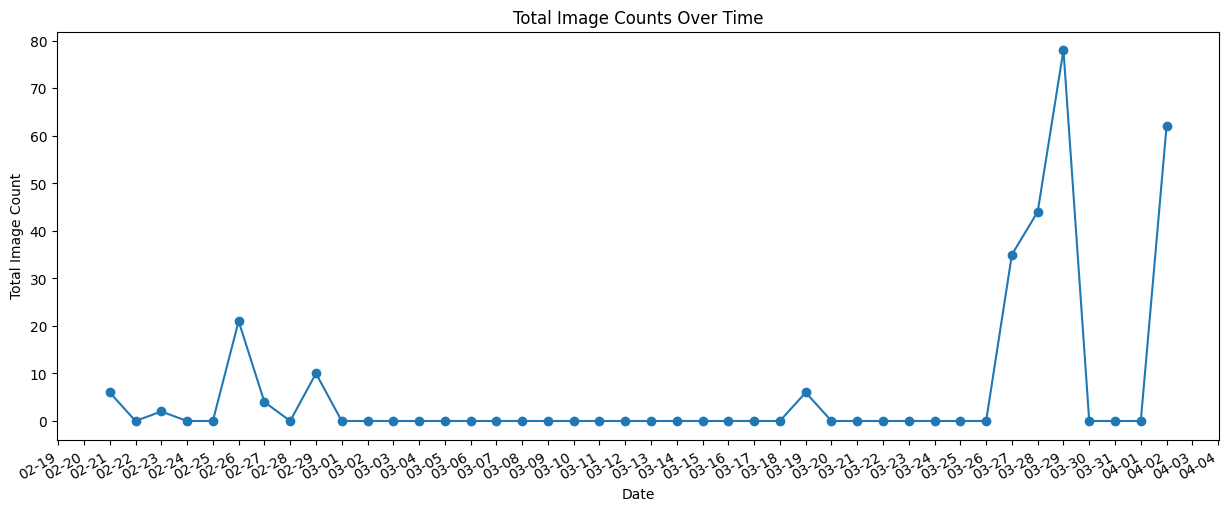

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from datetime import datetime

# 假设你的文件夹结构如下：
# /path/to/data/person_name/date/

# 文件结构
# main_folder/
# ├── person1/
# │   ├── date1/
# │   │   ├── file1
# │   │   └── file2
# │   └── date2/
# │       ├── file1
# │       └── file2
# └── person2/
#     ├── date1/
#     │   ├── file1
#     │   └── file2
#     └── date2/
#         ├── file1
#         └── file2
# 设置你的主文件夹路径

# 设置数据路径
data_path = '../outputs/'

# 初始化一个字典来存储每个日期的图片文件数
image_counts_by_date = {}

# 遍历所有的人名文件夹
for person_name in os.listdir(data_path):
    person_path = os.path.join(data_path, person_name)
    if os.path.isdir(person_path):
        # 遍历当前人的所有日期文件夹
        for date_name in os.listdir(person_path):
            try:
                # 尝试将日期名转换为datetime对象，以确保它是有效的日期格式
                current_date = datetime.strptime(date_name, '%Y-%m-%d')
                # 构建当前日期的完整路径
                date_path = os.path.join(person_path, date_name)
                # 如果当前路径是文件夹，则计算该文件夹中的图片文件数
                if os.path.isdir(date_path):
                    # 遍历日期文件夹中的所有文件
                    image_count = sum(1 for filename in os.listdir(date_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')))
                    # 将日期和对应的图片文件数存入字典
                    image_counts_by_date[current_date] = image_count
            except ValueError:
                # 如果日期名不是有效的日期字符串，则忽略
                continue

# 使用pandas创建一个日期范围
min_date = min(image_counts_by_date.keys())
max_date = max(image_counts_by_date.keys())
date_range = pd.date_range(start=min_date, end=max_date, freq='D')  # 以天为频率

# 使用pandas的reindex方法填充缺失的日期
image_counts_by_date = pd.Series(image_counts_by_date)
image_counts_by_date = image_counts_by_date.reindex(date_range, fill_value=0)

# 创建一个图表
plt.figure(figsize=(15, 6))  # 设置图表大小

# 绘制数据
plt.plot_date(date_range, image_counts_by_date, 'o-')

# 设置日期格式
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
date_format = mdates.DateFormatter('%m-%d')  # 显示月份和日期
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 设置日期主刻度间隔为1天

# 只显示总图片数目大于0的日期的月份和日期
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # 设置日期次刻度间隔为1天
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m-%d'))  # 显示月份和日期

# 设置图表标题和标签
plt.title('Total Image Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Image Count')

# 显示图表
plt.show()

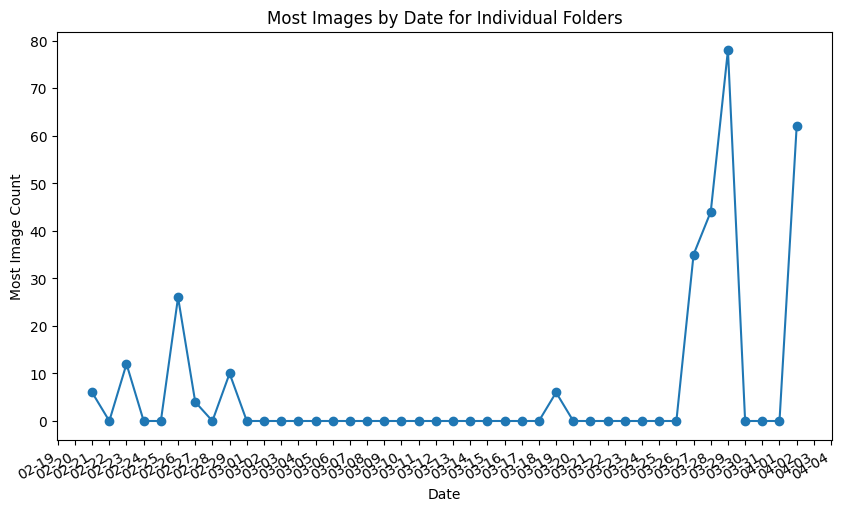

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from datetime import datetime, timedelta

# 假设你的文件夹结构如下：
# /path/to/data/person_name/date/

# 设置数据路径
data_path = '../outputs'

# 初始化一个字典来存储每个日期的图片文件数
image_counts_by_date = {}

# 遍历所有的人名文件夹
for person_name in os.listdir(data_path):
    person_path = os.path.join(data_path, person_name)
    if os.path.isdir(person_path):
        # 遍历当前人的所有日期文件夹
        for date_name in os.listdir(person_path):
            try:
                # 尝试将日期名转换为datetime对象，以确保它是有效的日期格式
                current_date = datetime.strptime(date_name, '%Y-%m-%d')
                # 构建当前日期的完整路径
                date_path = os.path.join(person_path, date_name)
                # 如果当前路径是文件夹，则计算该文件夹中的图片文件数
                if os.path.isdir(date_path):
                    # 遍历日期文件夹中的所有文件
                    image_count = sum(1 for filename in os.listdir(date_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')))
                    # 如果当前日期已经在字典中，则比较图片数量并更新
                    if current_date in image_counts_by_date:
                        image_counts_by_date[current_date] = max(image_counts_by_date[current_date], image_count)
                    else:
                        # 将日期和对应的图片文件数存入字典
                        image_counts_by_date[current_date] = image_count
            except ValueError:
                # 如果日期名不是有效的日期字符串，则忽略
                continue

# 使用pandas创建一个日期范围
min_date = min(image_counts_by_date.keys())
max_date = max(image_counts_by_date.keys())
date_range = pd.date_range(start=min_date, end=max_date, freq='D')  # 以天为频率

# 使用pandas的reindex方法填充缺失的日期
image_counts_by_date = pd.Series(image_counts_by_date)
image_counts_by_date = image_counts_by_date.reindex(date_range, fill_value=0)

# 创建一个图表
plt.figure(figsize=(10, 6))  # 设置图表大小

# 绘制数据
plt.plot_date(date_range, image_counts_by_date, 'o-')

# 设置日期格式
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
date_format = mdates.DateFormatter('%m-%d')  # 显示月日，不包括年份
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 设置日期主刻度间隔为1天

# 设置图表标题和标签
plt.title('Most Images by Date for Individual Folders')
plt.xlabel('Date')
plt.ylabel('Most Image Count')

# 显示图表
plt.show()